<a href="https://colab.research.google.com/github/JhoelHairton/Aplicativo-Demo/blob/main/Metricas_Web_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Cargar los datos
# Asume que subiste el archivo news_data.xlsx a Colab
df = pd.read_excel('news_data.xlsx')

print("Shape del dataset:", df.shape)
print("\nPrimeras filas:")
print(df.head())
print("\nInformación del dataset:")
print(df.info())

Shape del dataset: (1000, 7)

Primeras filas:
   id       source                                              title  \
0   1    BBC Mundo  Gobierno anuncia nuevo plan para el mercado la...   
1   2    BBC Mundo  Crecimiento del sector el mercado laboral supe...   
2   3  El Comercio  Expertos debaten sobre el mercado laboral y su...   
3   4    BBC Mundo  Crecimiento del sector la educación pública su...   
4   5          RPP  Investigación revela impacto de energías renov...   

             published                                            summary  \
0  2024-07-17 08:54:58  Según analistas, los datos muestran que gobier...   
1  2023-06-28 21:29:57  Representantes del sector comentaron que creci...   
2  2024-04-21 18:23:57  La medida, que busca mejorar la situación, pod...   
3  2025-05-09 08:01:33  Representantes del sector comentaron que creci...   
4  2025-05-15 12:23:17  Un estudio publicado esta semana señala que in...   

                                              link  

In [8]:
# EJEMPLO 1: Clasificación por FUENTE (BBC Mundo vs El Comercio vs RPP)
# Preparar datos
X = df['title'] + ' ' + df['summary']  # Texto combinado
y = df['source']  # Variable objetivo

In [9]:
# División train-test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [10]:
# Vectorización del texto (TF-IDF)
vectorizer = TfidfVectorizer(max_features=1000, stop_words=None)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [11]:
# Entrenar modelo simple (Naive Bayes)
model = MultinomialNB()
model.fit(X_train_vec, y_train)

MultinomialNB()

In [12]:
# Predicciones
y_pred = model.predict(X_test_vec)
y_pred_proba = model.predict_proba(X_test_vec)

# 1. MATRIZ DE CONFUSIÓN


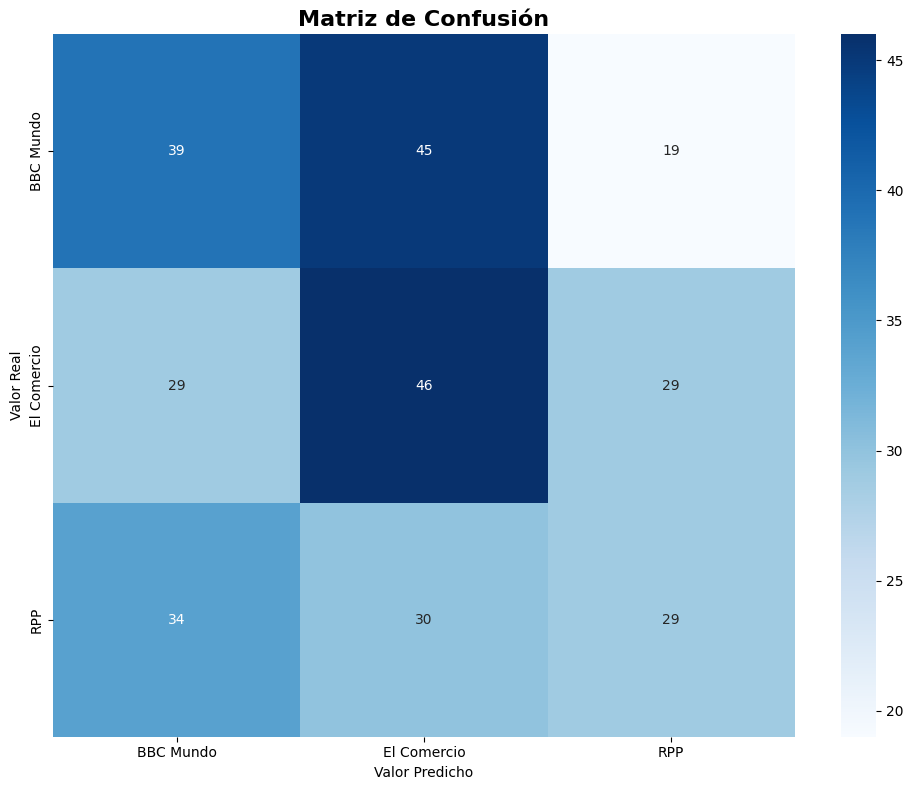

In [13]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.title('Matriz de Confusión', fontsize=16, fontweight='bold')
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho')
plt.tight_layout()
plt.show()


# 2. PRECISIÓN, RECALL, F1-SCORE


In [14]:
print("\n" + "="*60)
print("REPORTE DE CLASIFICACIÓN")
print("="*60)
print(classification_report(y_test, y_pred, target_names=model.classes_))

# Métricas individuales
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\n" + "="*60)
print("MÉTRICAS GLOBALES")
print("="*60)
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")


REPORTE DE CLASIFICACIÓN
              precision    recall  f1-score   support

   BBC Mundo       0.38      0.38      0.38       103
 El Comercio       0.38      0.44      0.41       104
         RPP       0.38      0.31      0.34        93

    accuracy                           0.38       300
   macro avg       0.38      0.38      0.38       300
weighted avg       0.38      0.38      0.38       300


MÉTRICAS GLOBALES
Accuracy:  0.3800
Precision: 0.3798
Recall:    0.3800
F1-Score:  0.3781


# 3. VISUALIZACIÓN DE MÉTRICAS


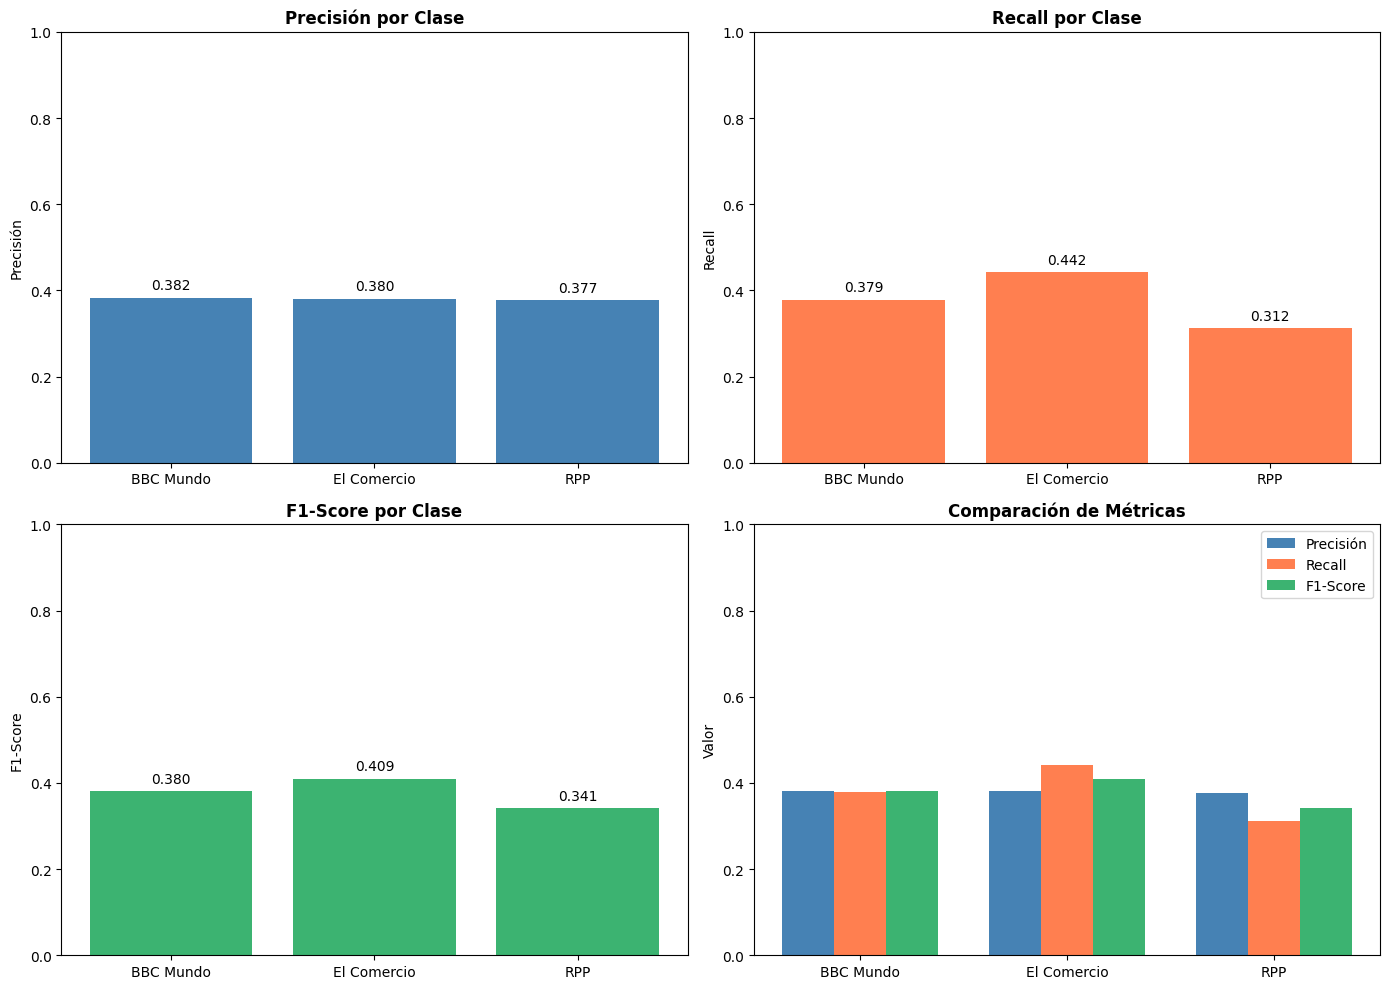

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Métricas por clase
report_dict = classification_report(y_test, y_pred, output_dict=True)
classes = list(model.classes_)
precisions = [report_dict[c]['precision'] for c in classes]
recalls = [report_dict[c]['recall'] for c in classes]
f1_scores = [report_dict[c]['f1-score'] for c in classes]

# Gráfico 1: Precisión por clase
axes[0, 0].bar(classes, precisions, color='steelblue')
axes[0, 0].set_title('Precisión por Clase', fontweight='bold')
axes[0, 0].set_ylim([0, 1])
axes[0, 0].set_ylabel('Precisión')
for i, v in enumerate(precisions):
    axes[0, 0].text(i, v + 0.02, f'{v:.3f}', ha='center')

# Gráfico 2: Recall por clase
axes[0, 1].bar(classes, recalls, color='coral')
axes[0, 1].set_title('Recall por Clase', fontweight='bold')
axes[0, 1].set_ylim([0, 1])
axes[0, 1].set_ylabel('Recall')
for i, v in enumerate(recalls):
    axes[0, 1].text(i, v + 0.02, f'{v:.3f}', ha='center')

# Gráfico 3: F1-Score por clase
axes[1, 0].bar(classes, f1_scores, color='mediumseagreen')
axes[1, 0].set_title('F1-Score por Clase', fontweight='bold')
axes[1, 0].set_ylim([0, 1])
axes[1, 0].set_ylabel('F1-Score')
for i, v in enumerate(f1_scores):
    axes[1, 0].text(i, v + 0.02, f'{v:.3f}', ha='center')

# Gráfico 4: Comparación de todas las métricas
x = np.arange(len(classes))
width = 0.25
axes[1, 1].bar(x - width, precisions, width, label='Precisión', color='steelblue')
axes[1, 1].bar(x, recalls, width, label='Recall', color='coral')
axes[1, 1].bar(x + width, f1_scores, width, label='F1-Score', color='mediumseagreen')
axes[1, 1].set_title('Comparación de Métricas', fontweight='bold')
axes[1, 1].set_ylabel('Valor')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(classes)
axes[1, 1].legend()
axes[1, 1].set_ylim([0, 1])

plt.tight_layout()
plt.show()

# 4. AUC-ROC (para clasificación multiclase)



AUC-ROC POR CLASE
BBC Mundo: 0.5088
El Comercio: 0.5559
RPP: 0.5526

AUC-ROC (Micro-average): 0.5411


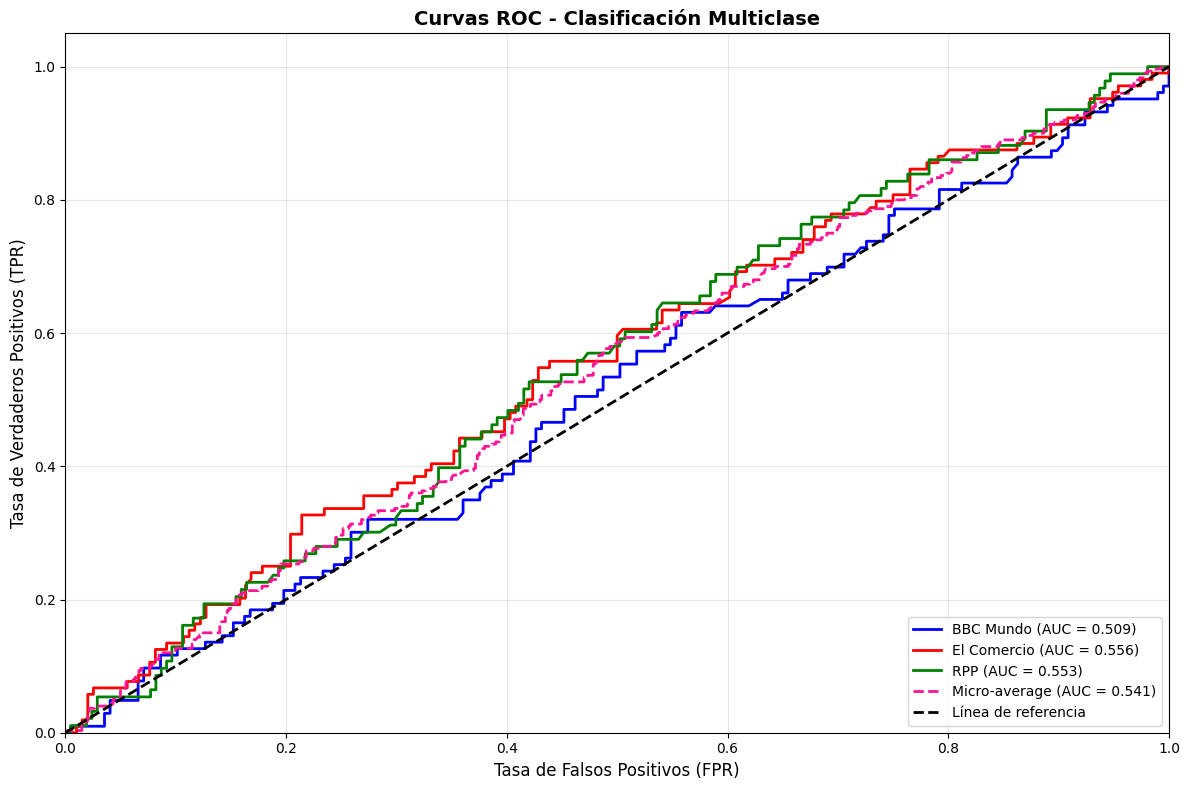

In [22]:
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Binarizar las etiquetas para clasificación multiclase
y_test_bin = label_binarize(y_test, classes=model.classes_)
n_classes = y_test_bin.shape[1]

# Calcular ROC y AUC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_pred_proba[:, i])

# Calcular micro-average ROC curve y ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = roc_auc_score(y_test_bin, y_pred_proba, average='micro', multi_class='ovr')

print("\n" + "="*60)
print("AUC-ROC POR CLASE")
print("="*60)
for i, class_name in enumerate(model.classes_):
    print(f"{class_name}: {roc_auc[i]:.4f}")
print(f"\nAUC-ROC (Micro-average): {roc_auc['micro']:.4f}")

# Graficar curvas ROC
plt.figure(figsize=(12, 8))
colors = cycle(['blue', 'red', 'green', 'orange', 'purple'])

for i, color, class_name in zip(range(n_classes), colors, model.classes_):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'{class_name} (AUC = {roc_auc[i]:.3f})')

plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle='--', lw=2,
         label=f'Micro-average (AUC = {roc_auc["micro"]:.3f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Línea de referencia')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)', fontsize=12)
plt.ylabel('Tasa de Verdaderos Positivos (TPR)', fontsize=12)
plt.title('Curvas ROC - Clasificación Multiclase', fontsize=14, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# 5. RESUMEN FINAL


In [23]:
print("\n" + "="*60)
print("RESUMEN DE RESULTADOS")
print("="*60)
print(f"Total de muestras de prueba: {len(y_test)}")
print(f"Clases: {list(model.classes_)}")
print(f"\nAccuracy global: {accuracy:.4f}")
print(f"Precision promedio: {precision:.4f}")
print(f"Recall promedio: {recall:.4f}")
print(f"F1-Score promedio: {f1:.4f}")
print(f"AUC-ROC (Micro-average): {roc_auc['micro']:.4f}")


RESUMEN DE RESULTADOS
Total de muestras de prueba: 300
Clases: [np.str_('BBC Mundo'), np.str_('El Comercio'), np.str_('RPP')]

Accuracy global: 0.3800
Precision promedio: 0.3798
Recall promedio: 0.3800
F1-Score promedio: 0.3781
AUC-ROC (Micro-average): 0.5411
